In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

In [2]:
file_path = Path("Output/signals_AMC.csv")
df_amc = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
df_amc.sort_index(inplace=True)
df_amc = df_amc[['Portfolio Minute Returns']]
df_amc.columns = ["AMC"]

In [3]:
file_path = Path("Output/signals_BB.csv")
df_bb = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
df_bb.sort_index(inplace=True)
df_bb = df_bb[['Portfolio Minute Returns']]
df_bb.columns = ["BB"]

In [4]:
file_path = Path("Output/signals_BBBY.csv")
df_bbby = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
df_bbby.sort_index(inplace=True)
df_bbby = df_bbby[['Portfolio Minute Returns']]
df_bbby.columns = ["BBBY"]

In [5]:
file_path = Path("Output/signals_GME.csv")
df_gme = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
df_gme.sort_index(inplace=True)
df_gme = df_gme[['Portfolio Minute Returns']]
df_gme.columns = ["GME"]

In [6]:
file_path = Path("Output/signals_NOK.csv")
df_nok = pd.read_csv(file_path, infer_datetime_format = True, parse_dates = True, index_col = "date_time")
df_nok.sort_index(inplace=True)
df_nok = df_nok[['Portfolio Minute Returns']]
df_nok.columns = ["NOK"]

In [7]:
df_data = df_amc.join(df_bb).join(df_bbby).join(df_gme).join(df_nok)
df_data.dropna(inplace=True)

In [8]:
df_data["AMC Vol"]  = df_data["AMC"].rolling(390).std() * np.sqrt(390) * np.sqrt(252)
df_data["BB Vol"]   = df_data["BB"].rolling(390).std() * np.sqrt(390) * np.sqrt(252)
df_data["BBBY Vol"] = df_data["BBBY"].rolling(390).std() * np.sqrt(390) * np.sqrt(252)
df_data["GME Vol"]  = df_data["GME"].rolling(390).std() * np.sqrt(390) * np.sqrt(252)
df_data["NOK Vol"]  = df_data["NOK"].rolling(390).std() * np.sqrt(390) * np.sqrt(252)
df_data.dropna(inplace=True)

In [9]:
df_data["AMC InvVol"]  = 1 / df_data["AMC Vol"]
df_data["BB InvVol"]   = 1 / df_data["BB Vol"]
df_data["BBBY InvVol"] = 1 / df_data["BBBY Vol"]
df_data["GME InvVol"]  = 1 / df_data["GME Vol"]
df_data["NOK InvVol"]  = 1 / df_data["NOK Vol"]

In [10]:
df_data["Sum of InvVol"] = df_data['AMC InvVol'] + df_data['BB InvVol'] +  df_data['BBBY InvVol'] +  df_data['GME InvVol'] +  df_data['NOK InvVol']

In [11]:
portfolio_df = pd.DataFrame({'AMC Alloc': df_data['AMC InvVol']/df_data['Sum of InvVol'],
                             'BB Alloc': df_data['BB InvVol']/df_data['Sum of InvVol'],
                             'BBBY Alloc': df_data['BBBY InvVol']/df_data['Sum of InvVol'],
                             'GME Alloc': df_data['GME InvVol']/df_data['Sum of InvVol'],
                             'NOK Alloc': df_data['NOK InvVol']/df_data['Sum of InvVol'], }, index=df_data.index)

In [12]:
portfolio_df['AMC Return']  = df_data['AMC'] * portfolio_df['AMC Alloc']
portfolio_df['BB Return']   = df_data['BB'] * portfolio_df['BB Alloc']
portfolio_df['BBBY Return'] = df_data['BBBY'] * portfolio_df['BBBY Alloc']
portfolio_df['GME Return']  = df_data['GME'] * portfolio_df['GME Alloc']
portfolio_df['NOK Return']  = df_data['NOK'] * portfolio_df['NOK Alloc']

In [13]:
portfolio_df['Portfolio Return'] = portfolio_df['AMC Return'] + portfolio_df['BB Return'] + portfolio_df['BBBY Return'] + portfolio_df['GME Return'] + portfolio_df['NOK Return']

In [14]:
portfolio_df['Portfolio Value'] = ((portfolio_df['Portfolio Return'] + 1).cumprod())*1e6

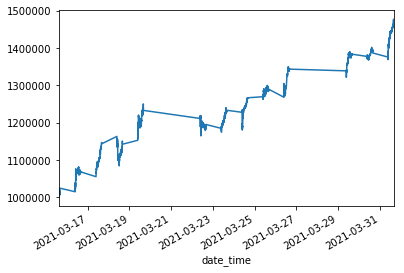

In [15]:
portfolio_df['Portfolio Value'].plot()